# Import libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from datetime import date, timedelta, datetime

# extract dataset

In [2]:
df=pd.read_csv(r'Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


we can see columns like that

In [4]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

using shape helps us to see data shape (how many columns and rows exist)

In [5]:
df.shape

(5268, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


find null values 

In [7]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

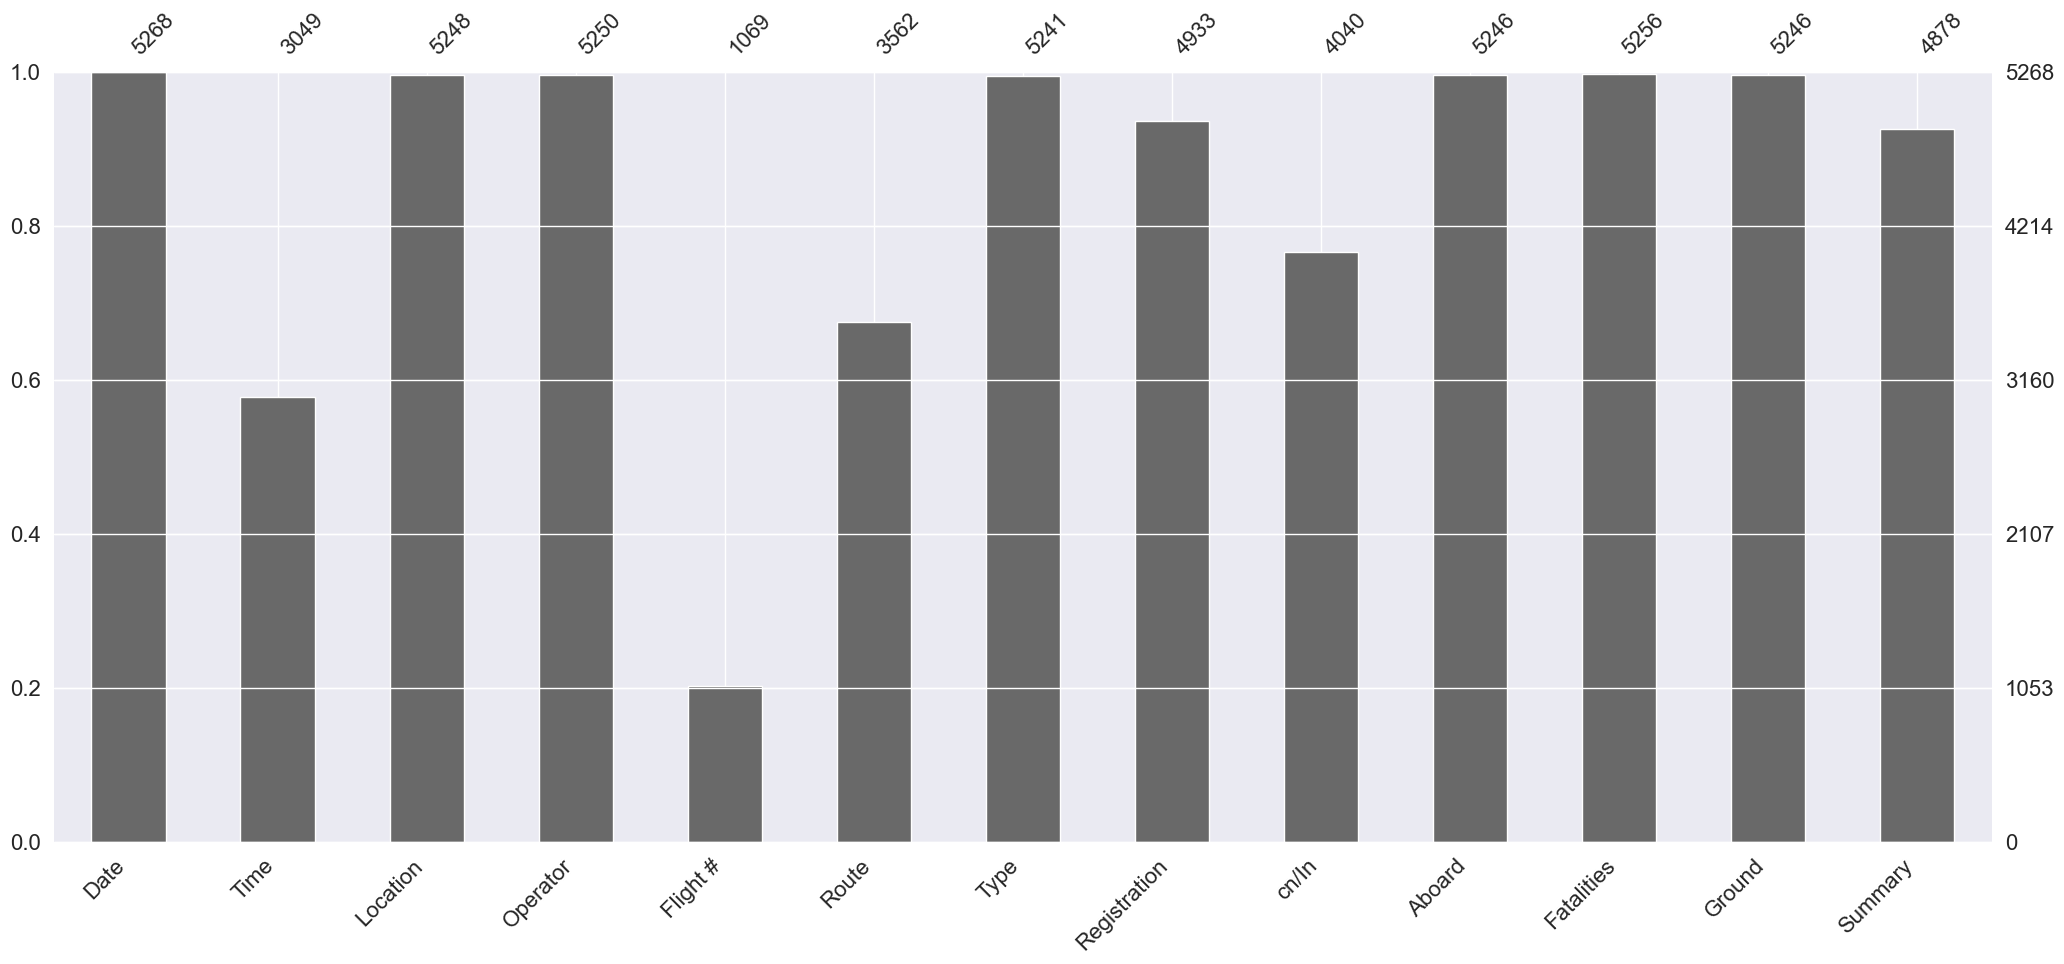

In [8]:
msn.bar(df)
plt.show()

it is the percentage of null values and we can see which column should be dropped

In [9]:
df.isnull().sum()/df.shape[0]

Date            0.000000
Time            0.421222
Location        0.003797
Operator        0.003417
Flight #        0.797077
Route           0.323842
Type            0.005125
Registration    0.063591
cn/In           0.233106
Aboard          0.004176
Fatalities      0.002278
Ground          0.004176
Summary         0.074032
dtype: float64

if in a column null values are more than 50% let's drop column 

In [10]:
df.drop('Flight #', axis=1,inplace=True)


In [11]:
df.head(20)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [12]:
df['Ground'].value_counts()

0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

In [13]:
df.nunique()

Date            4753
Time            1005
Location        4303
Operator        2476
Route           3244
Type            2446
Registration    4905
cn/In           3707
Aboard           239
Fatalities       191
Ground            50
Summary         4673
dtype: int64

using describe you can see std,min,max,mean

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0


In [15]:
df.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [16]:
df['Aboard'].value_counts().mean()

21.94979079497908

In [17]:
df['Aboard'].nunique()

239

In [18]:
df['Location'].value_counts()

Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: Location, Length: 4303, dtype: int64

In [19]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [20]:
df[(df['Location']=='Sao Paulo, Brazil')][['Location','Summary']]


,Location,Summary
469,"Sao Paulo, Brazil",The mail plane crashed while taking off.
664,"Sao Paulo, Brazil",Crashed in fog.
836,"Sao Paulo, Brazil",Crashed into the Solimoes extension of the Ama...
1148,"Sao Paulo, Brazil",Crashed into a house shortly after taking off ...
1203,"Sao Paulo, Brazil",Crashed while attempting to make an emergency ...
1269,"Sao Paulo, Brazil",Crashed while on final approach to Sao Paulo. ...
1327,"Sao Paulo, Brazil",The cargo plane crashed on takeoff. Elevator l...
1406,"Sao Paulo, Brazil",Crashed on takeoff.
1619,"Sao Paulo, Brazil",Crashed a few minutes after taking off from Sa...
1828,"Sao Paulo, Brazil",The crippled airliner crashed into houses and ...


In [21]:
df[(df['Fatalities']>20) & (df['Location']=='Sao Paulo, Brazil')]

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
1406,12/19/1955,NaN,"Sao Paulo, Brazil",Cruzeiro Do Sud,Sao Paulo - Belem,Douglas DC-3,NaN,NaN,26.0,26.0,0.0,Crashed on takeoff.
1848,05/03/1963,NaN,"Sao Paulo, Brazil",Cruzeiro,Sao Paulo - Rio de Janeiro,Convair CV-340-59,PP-CDW,159,50.0,37.0,0.0,The aircraft returned to airport after the No....
5159,07/17/2007,18:52,"Sao Paulo, Brazil",TAM (Brazil),Porto Alegre - Sao Paulo,Airbus A-320-233,PR-MBK,789,187.0,187.0,12.0,The jet airliner crashed while attempting to l...


In [22]:
df.head(5)

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


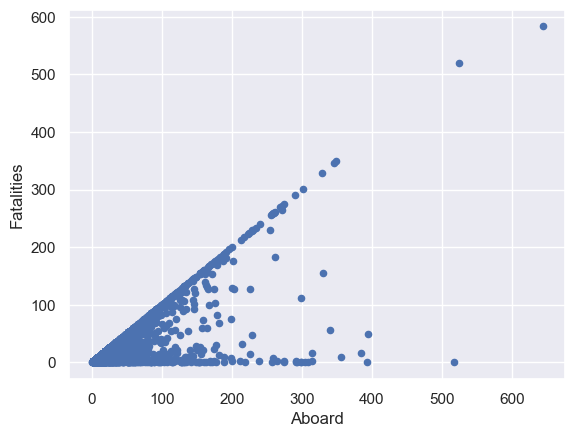

In [23]:
df.plot(x="Aboard", y="Fatalities", kind="scatter")
plt.show() 

In [24]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [25]:
df['Route'].value_counts()

Training                      81
Sightseeing                   29
Test flight                   17
Test                           6
Sao Paulo - Rio de Janeiro     5
                              ..
Manila - Lapu Lapu             1
Saint Denis - Paris            1
Cork - London                  1
Peoria, IL - St. Louis, MO     1
Mechuka for Jorhat             1
Name: Route, Length: 3244, dtype: int64

In [26]:
df['Time'] = df['Time'].str.replace('c: ', '')
df['Time'] = df['Time'].str.replace('c:', '')
df['Time'] = df['Time'].str.replace('c', '')
df['Time'] = df['Time'].str.replace('12\'20', '12:20')
df['Time'] = df['Time'].str.replace('18.40', '18:40')
df['Time'] = df['Time'].str.replace('0943', '09:43')
df['Time'] = df['Time'].str.replace('22\'08', '22:08')
df['Time'] = df['Time'].str.replace('114:20', '00:00')

'Time' column has NaN so we are going to fillna

In [27]:
df['Time'] = df['Time'].fillna('00:00')

multiply two columns to create another one

In [28]:
df['DateTime'] = df['Date'] + ' ' + df['Time']

In [29]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",09/17/1908 17:18
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,07/12/1912 06:30
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,08/06/1913 00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,09/09/1913 18:30
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,10/17/1913 10:30


In [30]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [31]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06 00:00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00


In [32]:
df['cn/In'].value_counts()

178         6
229         5
19          5
213         5
125         5
           ..
1114        1
19410       1
42929       1
45794/52    1
424         1
Name: cn/In, Length: 3707, dtype: int64

In [33]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06 00:00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00


# Years and fatalities

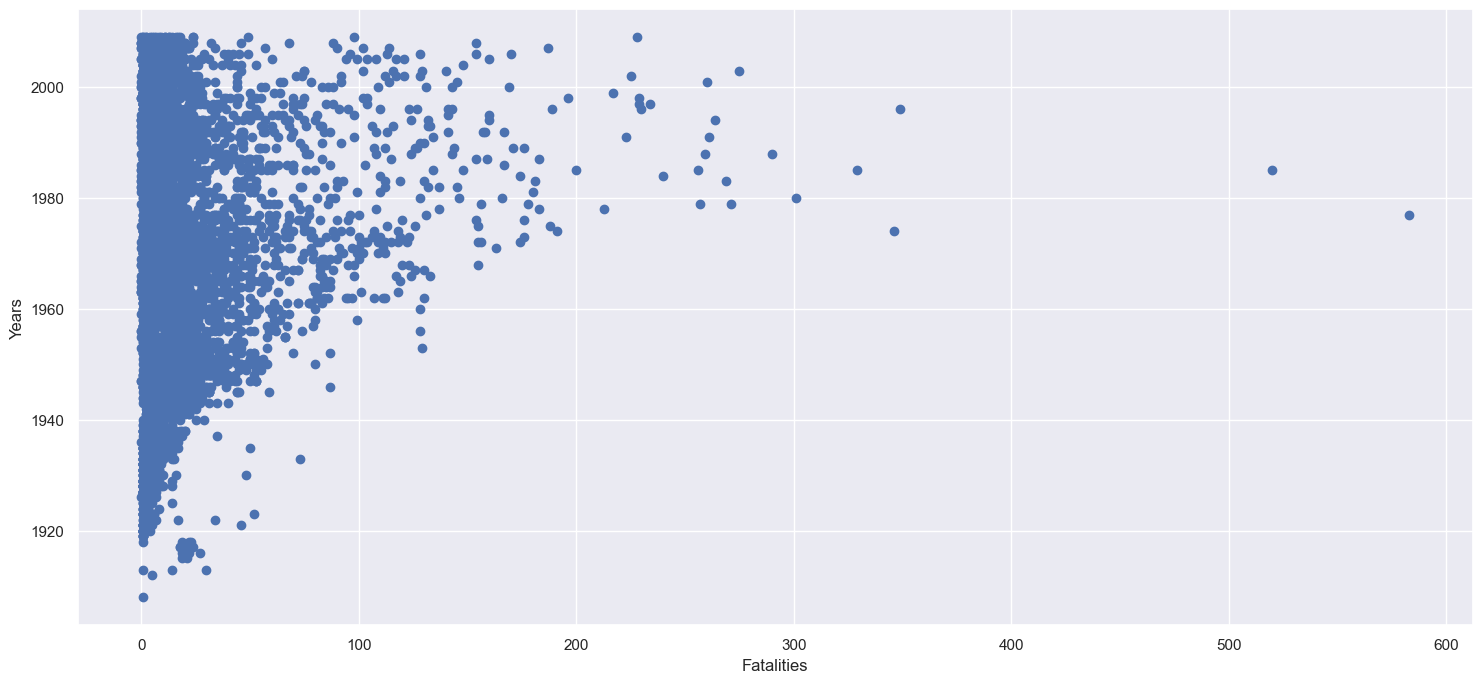

In [34]:
plt.figure(figsize= (18, 8))
years = df['DateTime'].dt.year
_= plt.plot(df['Fatalities'], years, 'o')
_= plt.xlabel('Fatalities')
_= plt.ylabel('Years')
plt.show()

# Accidents per years

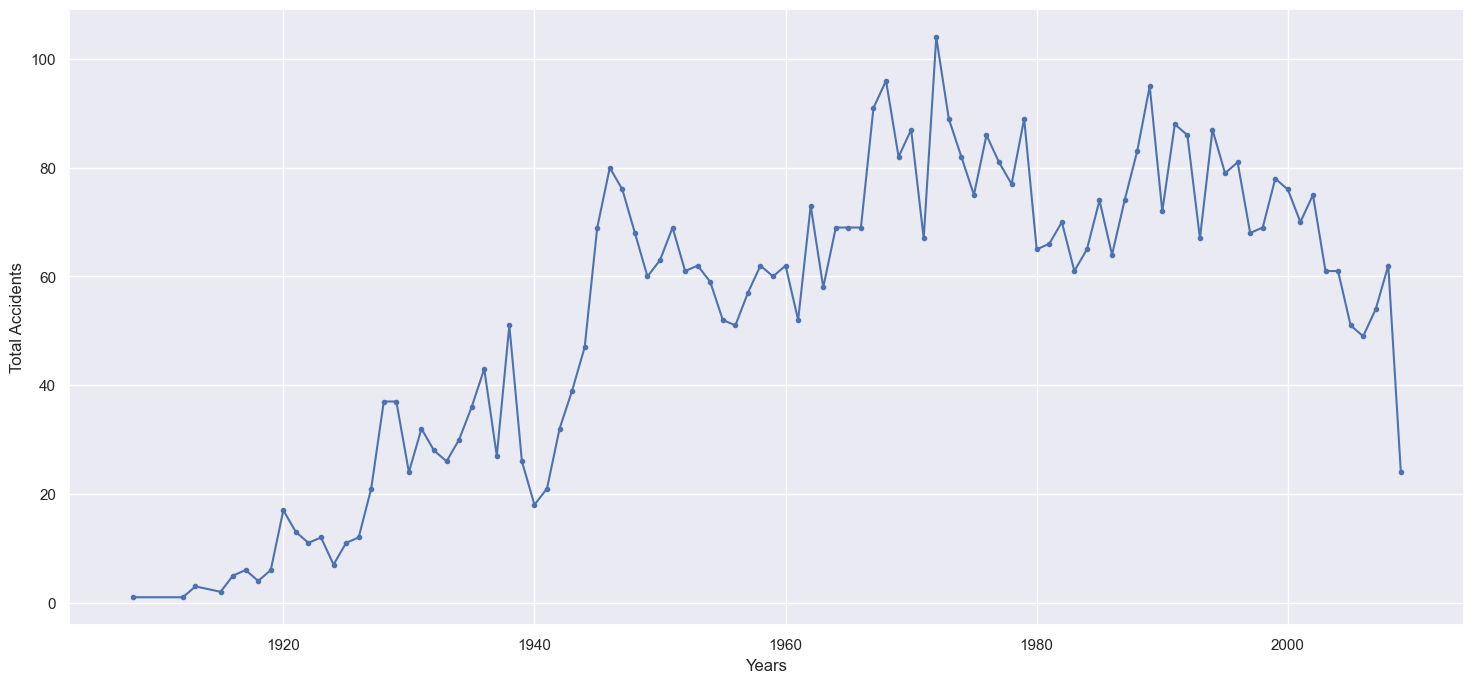

In [35]:
year_count = df.groupby(df.DateTime.dt.year)[['Date']].count()

plt.figure(figsize= (18, 8))
plt.plot(year_count.index, year_count['Date'], marker= '.')

plt.xlabel('Years')
plt.ylabel('Total Accidents')
plt.show()

# survivors and fatalities

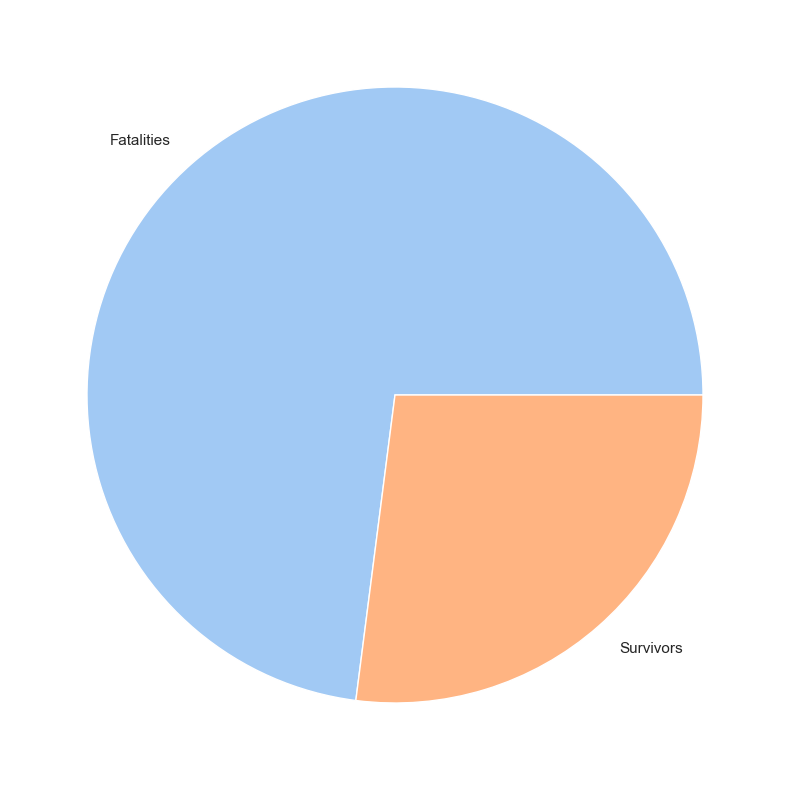

In [36]:
sns.set_palette('pastel')
plt.figure(figsize=(12,10))
Aboard = df.Aboard.sum()
Fatalities = df.Fatalities.sum()
Survivors = Aboard - Fatalities

y = np.array([Fatalities, Survivors])
mylabels = ["Fatalities", "Survivors"]

plt.pie(y, labels = mylabels)
plt.show()

In [37]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,DateTime
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908-09-17 17:18:00
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912-07-12 06:30:00
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913-08-06 00:00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913-09-09 18:30:00
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913-10-17 10:30:00


In [38]:
for columnn in df.columns:                              
    if df[columnn].dtype == 'object':          
        try:                                        
            df[columnn] = pd.to_datetime(df[columnn])
        except ValueError:
            pass

In [39]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [40]:
df.drop('DateTime',axis=1,inplace=True)
         

In [41]:
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year
0,1908-09-17,2023-02-27 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1912-07-12,2023-02-27 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
2,1913-08-06,2023-02-27 00:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
3,1913-09-09,2023-02-27 18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913
4,1913-10-17,2023-02-27 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913


# crashes per years

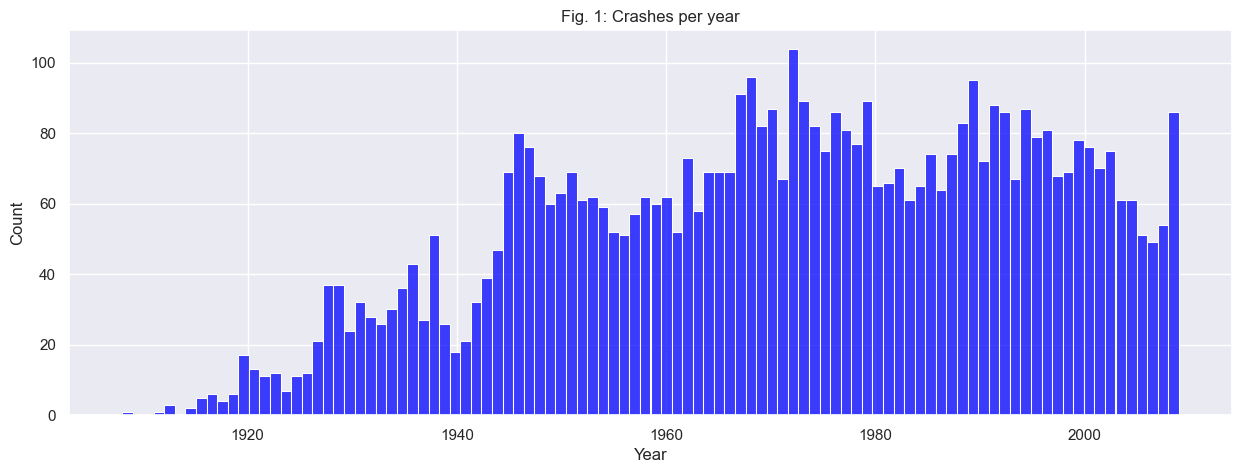

In [42]:

plt.figure(figsize=(15, 5))
per_year_plot = sns.histplot(data = df, x = 'Year', bins = 100, color = "blue")
per_year_plot.set(title = "Fig. 1: Crashes per year")
fig = per_year_plot.get_figure()
fig.savefig('per_year_plot.png')


airplane type and fatalities

In [43]:
df_fatal = df.groupby('Type')[['Fatalities']].sum()
df_fatal

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
...,...
de Havilland Dove 1,22.0
de Havilland Dragon 1,3.0
de Havilland RU-6A Beaver /Bell UH-1H,18.0


In [44]:
df_fatal = df_fatal.rename(columns={'Type': 'Fatalities'})
df_type_fatal = df_fatal.sort_values(by='Fatalities', ascending=False)
df_type_fatal_top10 = df_fatal.head(10) 
df_type_fatal_top10



,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
ATR-72-202,16.0
ATR-72-212,68.0
Aermacchi MB-339PAN (3 aircraft),3.0
Aero Commander 520,6.0


# airplane models and crushes

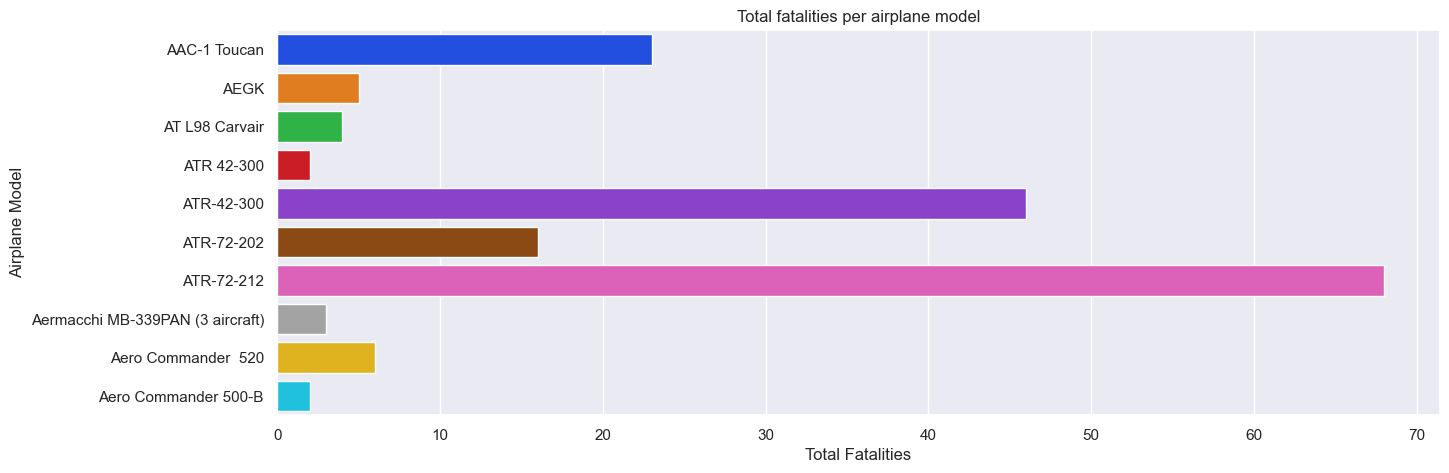

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_type_fatal_top10.index, x="Fatalities", data=df_type_fatal_top10, palette="bright")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()


In [46]:
airplanes = df[df['Fatalities'].notna()]
airplanes = df[df['Ground'].notna()]

In [47]:
df["Total Death"] = df["Fatalities"] + df["Ground"]
df.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Total Death
0,1908-09-17,2023-02-27 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1.0
1,1912-07-12,2023-02-27 06:30:00,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,5.0
2,1913-08-06,2023-02-27 00:00:00,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,1.0
3,1913-09-09,2023-02-27 18:30:00,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,14.0
4,1913-10-17,2023-02-27 10:30:00,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,30.0


In [48]:
df_death_airline = df.groupby('Operator')[['Total Death']].sum() 
df_death_airline = df_death_airline.rename(columns={"Operator": "Total Death"})
df_death_airline = df_death_airline.sort_values(by='Total Death', ascending=False)
df_death_airline_top10 = df_death_airline.head(10)

df_death_airline_top10

,Total Death
Operator,
Aeroflot,7184.0
American Airlines,4310.0
Military - U.S. Air Force,3866.0
United Air Lines,3770.0
Air France,1739.0
Pan American World Airways,1322.0
Military - U.S. Army Air Forces,1150.0
AVIANCA,944.0
Turkish Airlines (THY),891.0


# total death per airplane crushes

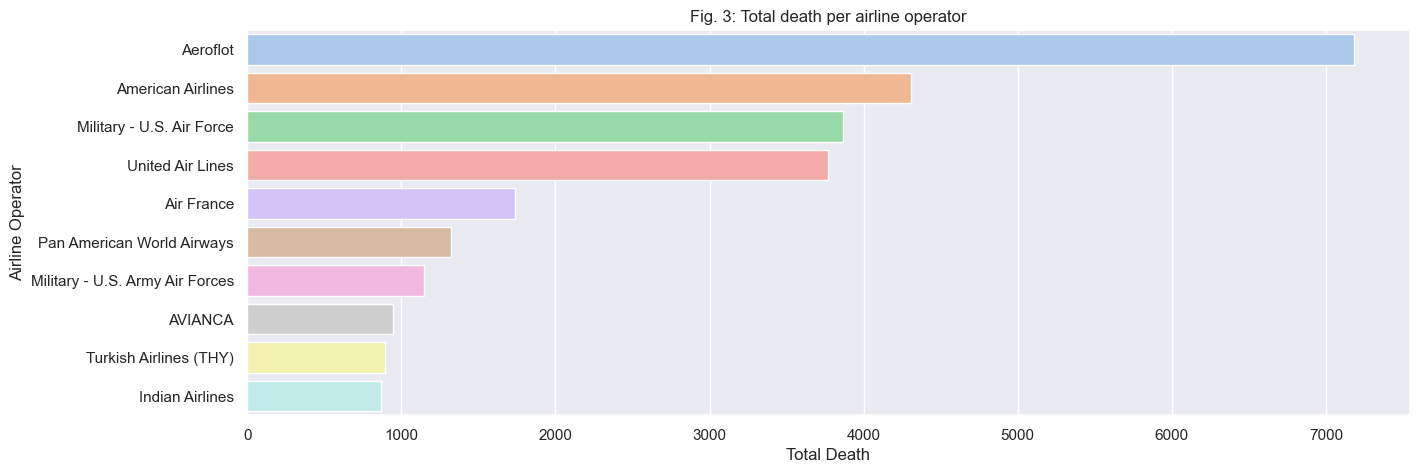

In [49]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_death_airline_top10.index, x="Total Death", data=df_death_airline_top10, palette="pastel")
plt.xlabel('Total Death')
plt.ylabel('Airline Operator')
plt.title('Fig. 3: Total death per airline operator')
plt.show()